In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from util import *

In [2]:
# Generate train/test data
X_train, X_test, y_train, y_test = generate_training_data()

After removing rows and columns:  (97865, 35)


/Users/tanvirislam/opt/miniconda3/envs/project/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Index(['age', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'num_med_change', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|num_med_change', 'gender_1', 'admission_type_id_3',
       'admission_type_id_4', 'admission_type_id_5',
       'discharge_disposition_id_2', 'discharge_disposition_id_7',
       'discharge_disposition_i

RF
0.9356990446165971
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25893
           1       1.00      0.87      0.93     26128

    accuracy                           0.94     52021
   macro avg       0.94      0.94      0.94     52021
weighted avg       0.94      0.94      0.94     52021



Text(0.5, 1.0, 'Random Forest/All Features')

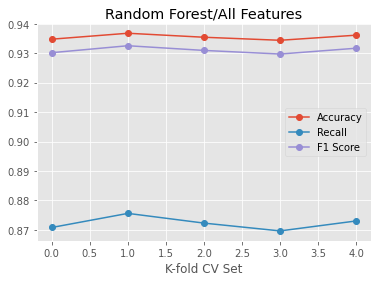

In [3]:
# Random forest
cv_scores = model_training_random_forest(X_train, y_train, X_test, y_test)
plot_cv_scores(cv_scores)
plt.title("Random Forest/All Features")

In [ ]:
# SVM
cv_scores = model_training_svm(X_train, y_train, X_test, y_test)
plt.figure()
plot_cv_scores(cv_scores)
plt.title("SVM/All Features")